In [2]:
import json

# Access JSON file with connection string

with open('G:\\My Drive\\School\\DATA 320\\readonly-credentials.json') as f:
    # Load the JSON data from the file.
    data = json.load(f)

    # Extract the readonly_key from the JSON data.
    readonly_key = data['readonly_key']

# Print a message indicating that the readonly_key was successfully retrieved.
print(f'My Secret key of {len(readonly_key)} length successfully retrieved!') 

My Secret key of 71 length successfully retrieved!


In [3]:
import pymongo
import certifi

# Connect to MongoDB Database with secret string.
mongo_connection_string = data['readonly_key']

client = pymongo.MongoClient(mongo_connection_string, tlsCAFile=certifi.where())

da320_database = client['DATA485']

allCollections = da320_database.list_collection_names()

# Verify database version and collection.
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")


Using MongoDB version 6.0.11.
This database has the collections ['NFL_STATS', 'shopping_trends', 'shopping_trends_pipeline']


In [4]:
import pandas as pd

# Retrieve all records from a collection - this can be a large amount of data!
cursor = da320_database["shopping_trends_pipeline"].find()

# Convert this information into a Pandas dataframe.
pipeline = pd.DataFrame(cursor)

trends_pipeline = pipeline

# Make sure we've read the information correctly.
trends_pipeline.head()

,_id,Customer_ID,Age,Gender,Item,Category,Amount,Location,Size,Color,Season,Review_Rating,Subscription,Discount_Applied,Used_Promo,Previous_Purchases,Frequency
0,654dd1314a04396415406465,1,55,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Yes,Yes,14,Fortnightly
1,654dd1314a04396415406466,2,19,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,Yes,Yes,Yes,2,Fortnightly
2,654dd1314a04396415406467,3,50,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,Yes,Yes,Yes,23,Weekly
3,654dd1314a04396415406468,4,21,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,Yes,Yes,Yes,49,Weekly
4,654dd1314a04396415406469,5,45,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.7,Yes,Yes,Yes,31,Annually


In [5]:
trends_pipeline['Numeric_Gender'], _ = pd.factorize(trends_pipeline['Gender'])
trends_pipeline['Numeric_Category'], _ = pd.factorize(trends_pipeline['Category'])
trends_pipeline['Numeric_Item'], _ = pd.factorize(trends_pipeline['Item'])
trends_pipeline['Numeric_Location'], _ = pd.factorize(trends_pipeline['Location'])
trends_pipeline['Numeric_Size'], _ = pd.factorize(trends_pipeline['Size'])
trends_pipeline['Numeric_Color'], _ = pd.factorize(trends_pipeline['Color'])
trends_pipeline['Numeric_Season'], _ = pd.factorize(trends_pipeline['Season'])
trends_pipeline['Numeric_Subscription'], _ = pd.factorize(trends_pipeline['Subscription'])
trends_pipeline['Numeric_Discount'], _ = pd.factorize(trends_pipeline['Discount_Applied'])

trends_pipeline.head()


,_id,Customer_ID,Age,Gender,Item,Category,Amount,Location,Size,Color,...,Frequency,Numeric_Gender,Numeric_Category,Numeric_Item,Numeric_Location,Numeric_Size,Numeric_Color,Numeric_Season,Numeric_Subscription,Numeric_Discount
0,654dd1314a04396415406465,1,55,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,...,Fortnightly,0,0,0,0,0,0,0,0,0
1,654dd1314a04396415406466,2,19,Male,Sweater,Clothing,64.0,Maine,L,Maroon,...,Fortnightly,0,0,1,1,0,1,0,0,0
2,654dd1314a04396415406467,3,50,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,...,Weekly,0,0,2,2,1,1,1,0,0
3,654dd1314a04396415406468,4,21,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,...,Weekly,0,1,3,3,2,1,1,0,0
4,654dd1314a04396415406469,5,45,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,...,Annually,0,0,0,4,2,2,1,0,0


In [6]:
df = ["Age", "Amount", "Review_Rating", "Numeric_Gender", "Numeric_Category", "Numeric_Item", "Numeric_Location", "Numeric_Size", "Numeric_Color", "Numeric_Season", "Numeric_Subscription", "Numeric_Discount"]

new_df = trends_pipeline[df]

new_df.head()

,Age,Amount,Review_Rating,Numeric_Gender,Numeric_Category,Numeric_Item,Numeric_Location,Numeric_Size,Numeric_Color,Numeric_Season,Numeric_Subscription,Numeric_Discount
0,55,53.0,3.1,0,0,0,0,0,0,0,0,0
1,19,64.0,3.1,0,0,1,1,0,1,0,0,0
2,50,73.0,3.1,0,0,2,2,1,1,1,0,0
3,21,90.0,3.5,0,1,3,3,2,1,1,0,0
4,45,49.0,2.7,0,0,0,4,2,2,1,0,0


In [7]:
import statsmodels.formula.api

ols_model = statsmodels.formula.api.ols(
    formula="Review_Rating ~ Age + Amount + Numeric_Gender + Numeric_Category + Numeric_Item + Numeric_Location + Numeric_Size + Numeric_Color + Numeric_Season + Numeric_Subscription + Numeric_Discount",
    data=new_df).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:          Review_Rating   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.553
Date:                Sat, 11 Nov 2023   Prob (F-statistic):              0.106
Time:                        16:54:36   Log-Likelihood:                -4223.1
No. Observations:                3900   AIC:                             8470.
Df Residuals:                    3888   BIC:                             8545.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.7450 

In [8]:
Location_df = trends_pipeline[["Item", "Review_Rating", "Amount"]]

Location_Sales = Location_df.groupby(["Item"]).sum()

Location_Sales = Location_Sales.sort_values(by=['Amount', 'Review_Rating'], ascending=False)

Location_Sales.head()


,Review_Rating,Amount
Item,,
Blouse,629.9,10410.0
Shirt,613.4,10332.0
Dress,623.3,10320.0
Pants,635.9,10090.0
Jewelry,642.3,10010.0


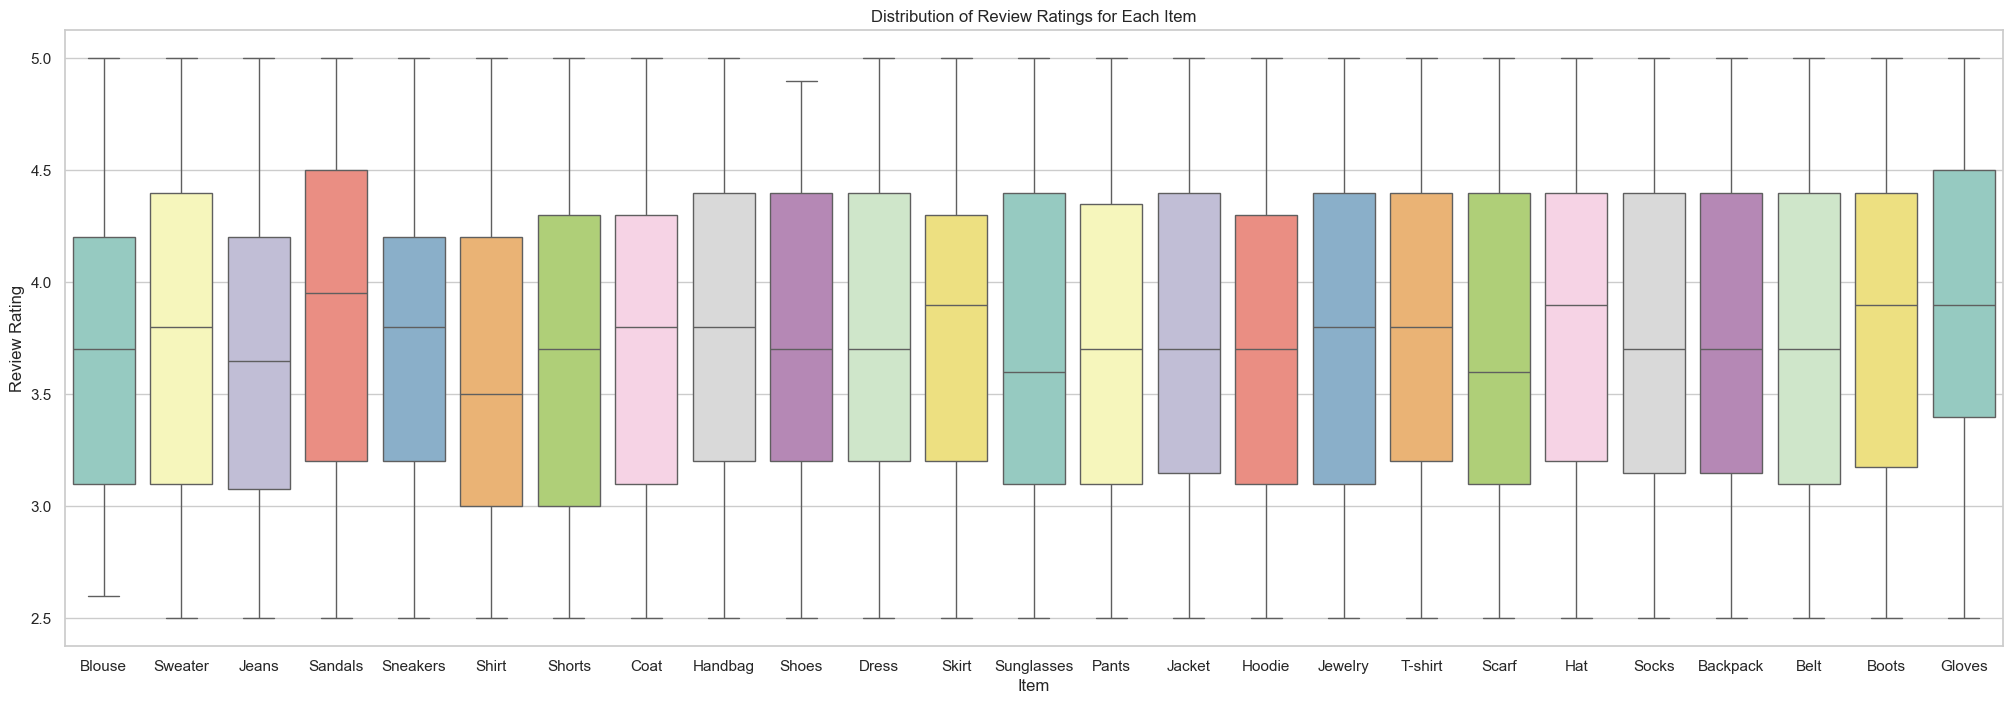

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Location_df contains 'Item' and 'Review_Rating' columns

# Set the style for the plot using seaborn
sns.set(style="whitegrid")

# Create a grouped boxplot
plt.figure(figsize=(25, 8))
sns.boxplot(x='Item', y='Review_Rating', hue='Item', data=Location_df, palette='Set3', legend=False)

# Set plot labels and title
plt.xlabel('Item')
plt.ylabel('Review Rating')
plt.title('Distribution of Review Ratings for Each Item')

# Show the plot
plt.show()


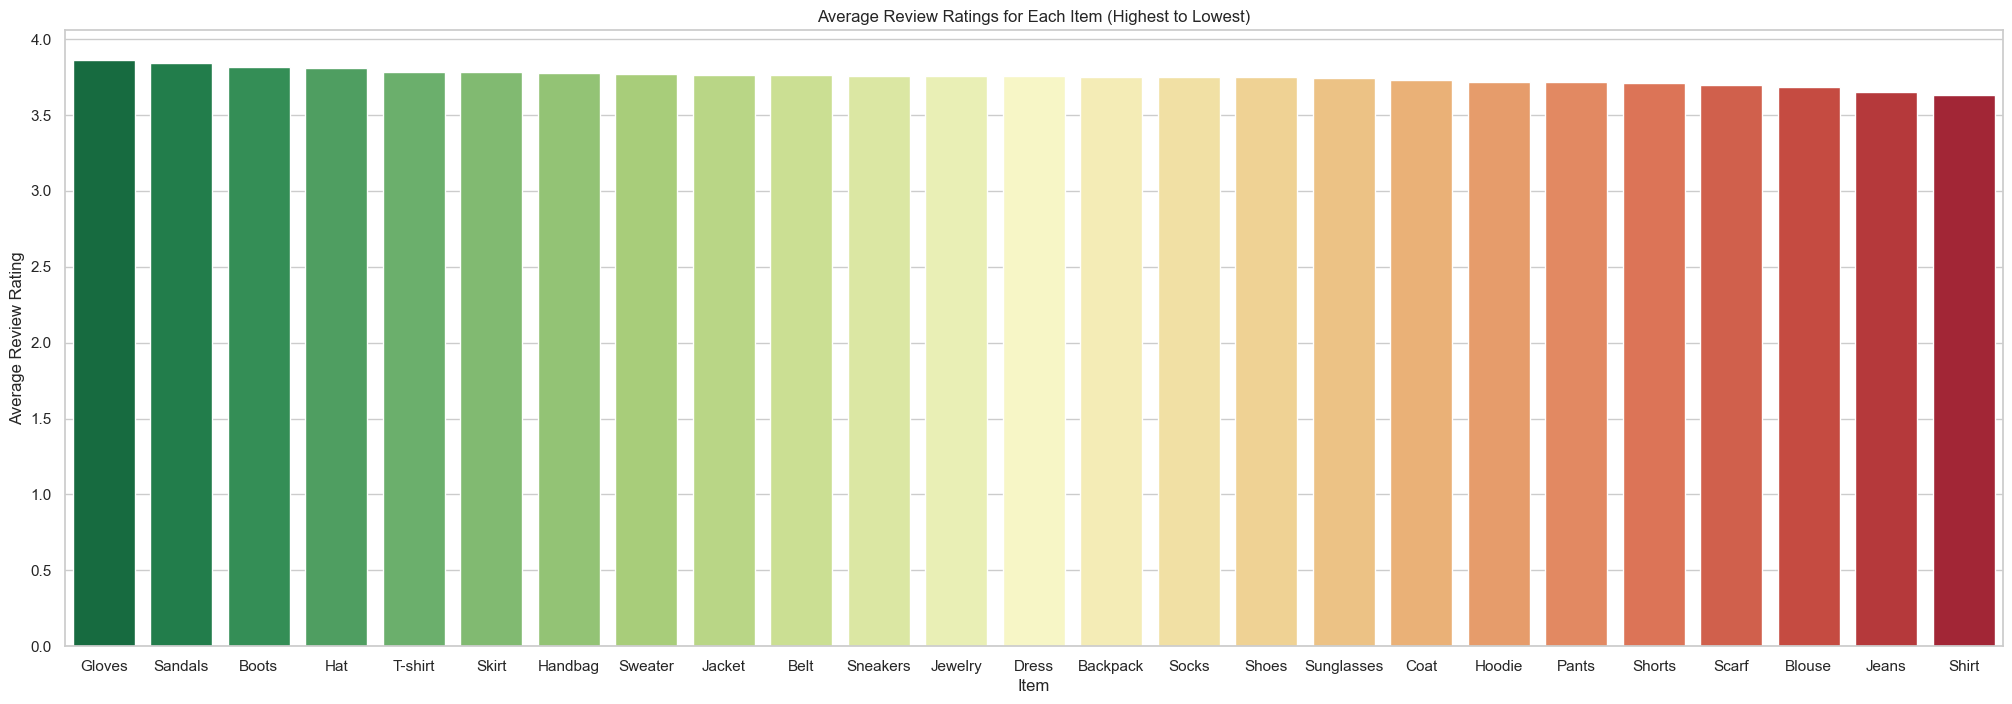

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming trends_pipeline contains the DataFrame with the listed fields

# Calculate average review ratings for each item
item_avg_ratings = trends_pipeline.groupby('Item')['Review_Rating'].mean().reset_index()

# Sort the DataFrame by average review ratings in descending order
item_avg_ratings_sorted = item_avg_ratings.sort_values(by='Review_Rating', ascending=False)

# Set the style for the plot using seaborn
sns.set(style="whitegrid")

# Create a bar chart with a green-to-red color palette
plt.figure(figsize=(25, 8))
sns.barplot(x='Item', y='Review_Rating', hue='Item', data=item_avg_ratings_sorted, palette=sns.color_palette("RdYlGn_r", n_colors=len(item_avg_ratings_sorted)), legend=False)

# Set plot labels and title
plt.xlabel('Item')
plt.ylabel('Average Review Rating')
plt.title('Average Review Ratings for Each Item (Highest to Lowest)')

# Show the plot
plt.show()


C:\Users\cvoko\AppData\Local\Temp\ipykernel_23336\3640829462.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item', y='Previous_Purchases', data=top_bottom_items, palette='viridis')


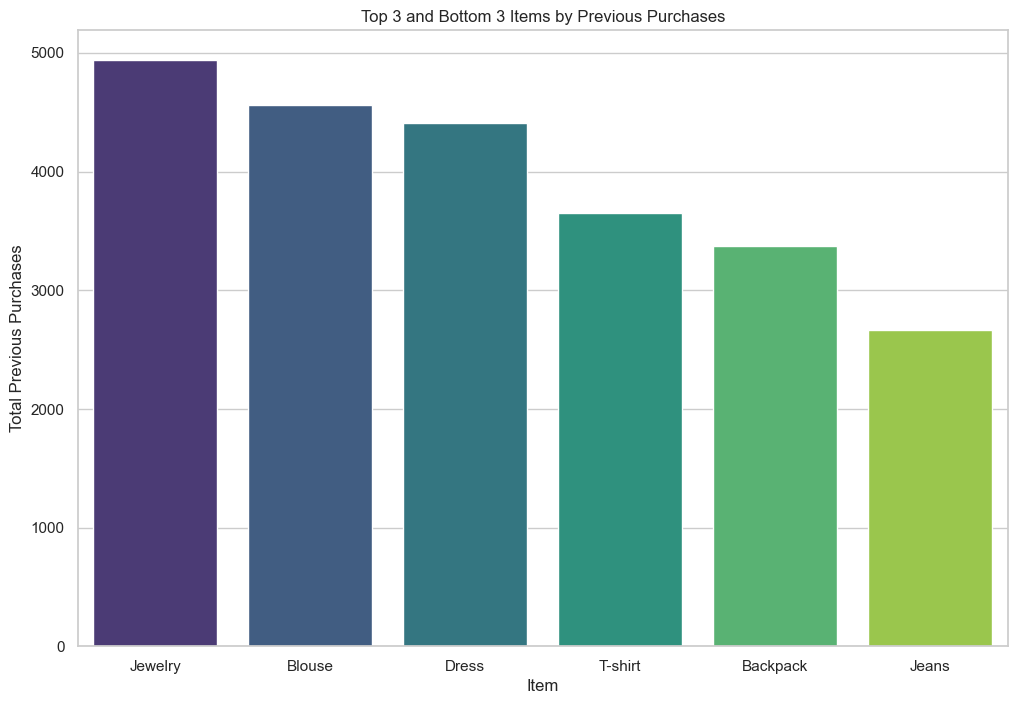

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming trends_pipeline contains 'Item' and 'Previous_Purchases' columns

# Calculate the total previous purchases for each item
item_total_purchases = trends_pipeline.groupby('Item')['Previous_Purchases'].sum().reset_index()

# Sort the DataFrame by previous purchases
sorted_items = item_total_purchases.sort_values(by='Previous_Purchases', ascending=False)

# Extract the top 3 and bottom 3 items
top3_items = sorted_items.head(3)
bottom3_items = sorted_items.tail(3)

# Concatenate the top and bottom items for the final plot
top_bottom_items = pd.concat([top3_items, bottom3_items])

# Set the style for the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Item', y='Previous_Purchases', data=top_bottom_items, palette='viridis')

# Set plot labels and title
plt.xlabel('Item')
plt.ylabel('Total Previous Purchases')
plt.title('Top 3 and Bottom 3 Items by Previous Purchases')

# Show the plot
plt.show()


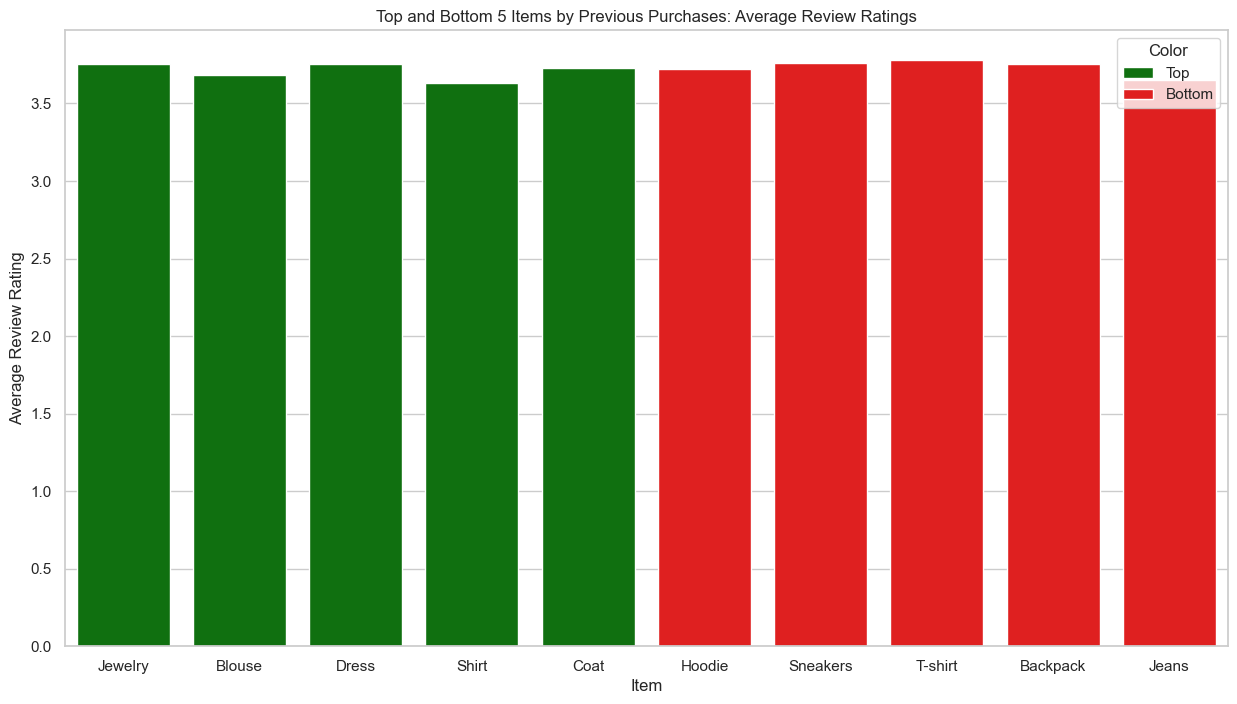

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming trends_pipeline contains 'Previous_Purchases', 'Review_Rating', and 'Item' columns

# Calculate the mean review rating for each item
item_avg_ratings = trends_pipeline.groupby('Item')['Review_Rating'].mean().reset_index()

# Sort the items based on previous purchases in descending order
sorted_items = trends_pipeline.groupby('Item')['Previous_Purchases'].sum().reset_index().sort_values(by='Previous_Purchases', ascending=False)

# Select the top 5 and bottom 5 items
top5_items = sorted_items.head(5)
bottom5_items = sorted_items.tail(5)

# Include the 'Review_Rating' column in the top_bottom_items DataFrame
top_bottom_items = pd.merge(pd.concat([top5_items, bottom5_items]), item_avg_ratings, on='Item', how='left')

# Set the style for the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(15, 8))

# Assign a color based on whether the item is in the top or bottom group
top_bottom_items['Color'] = ['Top' if item in top5_items['Item'].values else 'Bottom' for item in top_bottom_items['Item']]

# Use hue to distinguish between the top and bottom items
sns.barplot(x='Item', y='Review_Rating', data=top_bottom_items, hue='Color', palette={'Top': 'green', 'Bottom': 'red'})

# Set plot labels and title
plt.xlabel('Item')
plt.ylabel('Average Review Rating')
plt.title('Top and Bottom 5 Items by Previous Purchases: Average Review Ratings')

# Show the plot
plt.show()


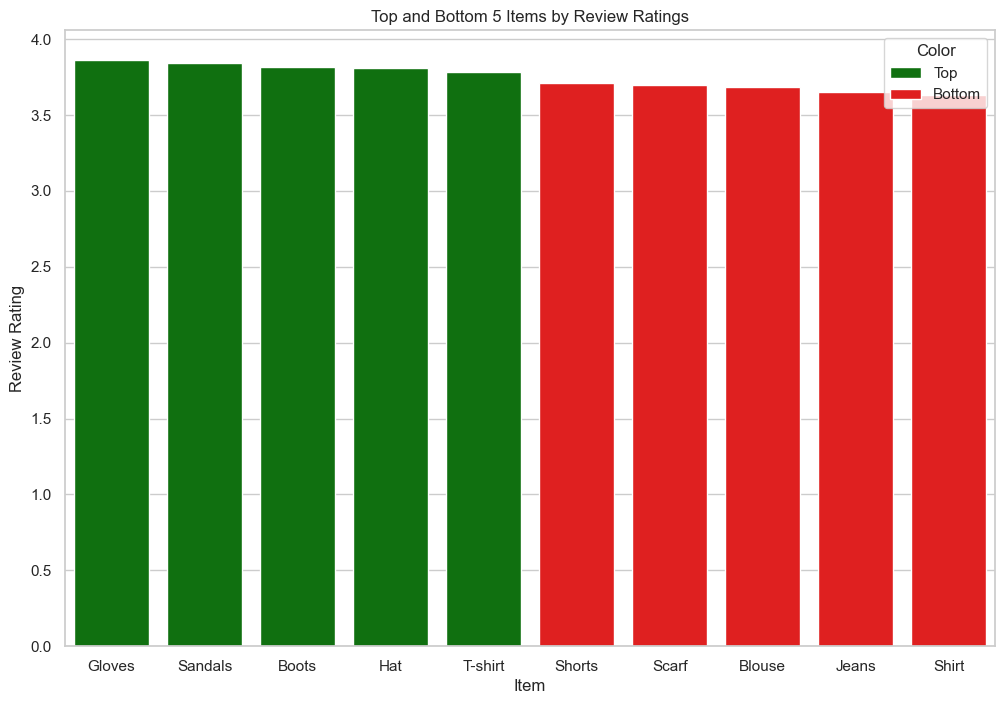

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming trends_pipeline contains 'Review_Rating' and 'Item' columns

# Calculate the mean review rating for each item
item_avg_ratings = trends_pipeline.groupby('Item')['Review_Rating'].mean().reset_index()

# Sort the items based on review ratings in descending order
sorted_items = item_avg_ratings.sort_values(by='Review_Rating', ascending=False)

# Select the top 5 and bottom 5 items
top5_items = sorted_items.head(5)
bottom5_items = sorted_items.tail(5)

# Concatenate the top and bottom items for the final plot
top_bottom_items = pd.concat([top5_items, bottom5_items])

# Set the style for the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 8))

# Assign a color based on whether the item is in the top or bottom group
top_bottom_items['Color'] = ['Top' if item in top5_items['Item'].values else 'Bottom' for item in top_bottom_items['Item']]

# Use hue to distinguish between the top and bottom items
sns.barplot(x='Item', y='Review_Rating', data=top_bottom_items, hue='Color', palette={'Top': 'green', 'Bottom': 'red'})

# Set plot labels and title
plt.xlabel('Item')
plt.ylabel('Review Rating')
plt.title('Top and Bottom 5 Items by Review Ratings')

# Show the plot
plt.show()
